## Análisis de bases de datos  

### <b>Taller 5: Análisis de componentes principales</b>  

Laura Nicole Bermudez Santa - labermudezs@unal.edu.co  
David Sebastián Mendoza Cruz - damendozac@unal.edu.co  
David Alejandro Alquichire Rincón - dalquichire@unal.edu.co  
Laura Nicole Bermudez Santa - labermudezs@unal.edu.co  
Juan David Bernal Vesga - jubernalv@unal.edu.co

En el Excel adjunto encontrarán una base de datos correspondiente a la composición nutricional de hamburguesas producidas por las siguientes empresas: Arby's, Burger King, Chick-fil-a, Dairy Queen, McDonald's y Sonic. La información de la composición nutricional de las hamburguesas contiene los siguientes atributos:
- Calories
- TotalFat_g (Grasa total en gramos).
- Sodium_mg (Sodio en miligramos).
- CaloriesFromFat (Calorías proveniente de grasas en gramos)
- SaturatedFat_g (Grasas saturadas en gramos)
- TransFat_g (Grasas trans en gramos)
- Cholesterol_mg (Colesterol en mili gramos)
- Carbohydrates_g (Carbohidratos en gramos)
- Fiber_g (Fibra en gramos)
- Sugars_g (Azúcar en gramos)
- Protein_g (Proteínas en gramos)


In [33]:
# Importamos algunas librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# Leemos el archivo
Hamburguesas = pd.read_csv('Hamburguesas.csv')
Hamburguesas.head(5)

,Meat,Type,Sandwich,Calories,TotalFat_g,Sodium_mg,CaloriesFromFat,SaturatedFat_g,TransFat_g,Cholesterol_mg,Carbohydrates_g,Fiber_g,Sugars_g,Protein_g,Restaurant
0,Ham,Sandwich,Arby-Q Sandwich,400,10,1230,90,"3,0","0,0",30,58,3,23,18,Arby's
1,Ham,Crossover,Arby’s Melt,330,11,920,100,"4,0","0,0",30,40,2,5,18,Arby's
2,Beef,Crossover,Beef ‘n Cheddar Classic,440,18,1290,160,"5,0","1,0",45,47,2,9,23,Arby's
3,Beef,Crossover,Beef ‘n Cheddar Mid,530,23,1720,200,"7,0","1,0",80,48,2,9,34,Arby's
4,Beef,Burger,Jr Deluxe Sandwich,260,12,560,110,"3,0","0,0",30,26,2,4,13,Arby's


1. Mapa de calor para la matriz de correlación.

In [34]:
def Tabular_corr_matrix(corr_mat):
    '''
    Esta función presenta en forma tabular
    la correlación entre pares de columnas eliminando los
    pares iguales
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','correlación']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat = corr_mat.sort_values('correlación', ascending=False)

    return(corr_mat)

corr_matrix = Hamburguesas.select_dtypes(include=['number']).corr(method='pearson')

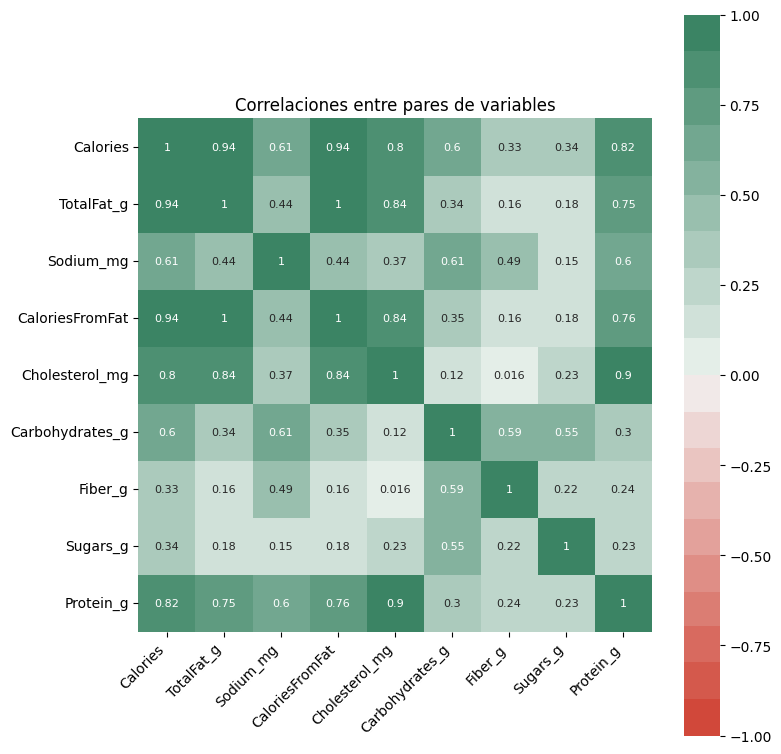

In [35]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

sb.heatmap(
    corr_matrix,
    annot=True,
    cbar=True,
    annot_kws={"size": 8},
    vmin=-1,
    vmax=1,
    center=0,
    cmap=sb.diverging_palette(15, 150, n=20),
    square=True,
    ax=ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right',
)

ax.tick_params(labelsize=10)
ax.set_title("Correlaciones entre pares de variables")
plt.tight_layout()
plt.show()

2. Matriz de datos centralizados.

In [36]:
# Eliminamos valores no numericos
df_hamburguesas = Hamburguesas.select_dtypes(include=['number'])
df_hamburguesas.head(5)

,Calories,TotalFat_g,Sodium_mg,CaloriesFromFat,Cholesterol_mg,Carbohydrates_g,Fiber_g,Sugars_g,Protein_g
0,400,10,1230,90,30,58,3,23,18
1,330,11,920,100,30,40,2,5,18
2,440,18,1290,160,45,47,2,9,23
3,530,23,1720,200,80,48,2,9,34
4,260,12,560,110,30,26,2,4,13


In [37]:
df_hamburguesas = df_hamburguesas.sub(df_hamburguesas.mean(), axis=1) ##Substrae la media de cada uno de los elementos de cada columna de datos
df_hamburguesas.head(5)

# y Centralizamos los datos en la siguiente tabla

,Calories,TotalFat_g,Sodium_mg,CaloriesFromFat,Cholesterol_mg,Carbohydrates_g,Fiber_g,Sugars_g,Protein_g
0,-134.146341,-17.439024,10.0,-156.737805,-44.420732,14.073171,0.256098,16.152439,-9.713415
1,-204.146341,-16.439024,-300.0,-146.737805,-44.420732,-3.926829,-0.743902,-1.847561,-9.713415
2,-94.146341,-9.439024,70.0,-86.737805,-29.420732,3.073171,-0.743902,2.152439,-4.713415
3,-4.146341,-4.439024,500.0,-46.737805,5.579268,4.073171,-0.743902,2.152439,6.286585
4,-274.146341,-15.439024,-660.0,-136.737805,-44.420732,-17.926829,-0.743902,-2.847561,-14.713415


3. Cálculo de SVD para la matriz de covarianza.


Determinamos la matriz de covarianza para poder determinar la factorización de esta matriz,

In [38]:
D = pd.DataFrame(df_hamburguesas).values
cov_matrix = np.matmul(D.transpose(),D)/len(D)
cov_matrix

array([[4.16218322e+04, 2.90110648e+03, 5.43262195e+04, 2.60391359e+04,
        6.99081648e+03, 1.92341315e+03, 1.08805770e+02, 2.83558894e+02,
        1.84222487e+03],
       [2.90110648e+03, 2.27417014e+02, 2.90865854e+03, 2.03688950e+03,
        5.40315289e+02, 8.13735872e+01, 3.91731112e+00, 1.13047293e+01,
        1.24961184e+02],
       [5.43262195e+04, 2.90865854e+03, 1.89687805e+05, 2.61722561e+04,
        6.95518293e+03, 4.17524390e+03, 3.50975610e+02, 2.67865854e+02,
        2.85914634e+03],
       [2.60391359e+04, 2.03688950e+03, 2.61722561e+04, 1.82590227e+04,
        4.84841519e+03, 7.35432035e+02, 3.62987061e+01, 1.02490519e+02,
        1.12494925e+03],
       [6.99081648e+03, 5.40315289e+02, 6.95518293e+03, 4.84841519e+03,
        1.81689006e+03, 8.03539560e+01, 1.10165080e+00, 4.03385262e+01,
        4.25077893e+02],
       [1.92341315e+03, 8.13735872e+01, 4.17524390e+03, 7.35432035e+02,
        8.03539560e+01, 2.46470256e+02, 1.49934563e+01, 3.55071386e+01,
        5.2

In [48]:
U, S, V = np.linalg.svd(cov_matrix, full_matrices=True)

De este modo obtenemos los siguientes valores para U, S y V respectivamente.

In [49]:
# U
U

array([[-3.21600971e-01, -7.23879214e-01,  5.62782392e-01,
         1.13519188e-01,  1.41748946e-01,  3.31837234e-03,
        -1.42894683e-01, -4.87614507e-02,  7.79277060e-03],
       [-1.87793615e-02, -6.28193672e-02, -7.60191333e-02,
        -4.55936962e-02, -1.79180652e-02, -1.14441466e-02,
        -4.92410464e-02,  5.73615016e-03, -9.92438290e-01],
       [-9.30025873e-01,  3.61866917e-01, -6.28347519e-02,
        -1.02037788e-02, -6.78084872e-03,  8.17348372e-04,
        -2.27939081e-03, -5.17408070e-05,  2.00517549e-04],
       [-1.68821838e-01, -5.62826620e-01, -6.70099903e-01,
        -3.94383059e-01, -1.21874871e-01,  2.37966321e-02,
         1.46540312e-01,  5.10472464e-02,  1.03217521e-01],
       [-4.50768492e-02, -1.53200700e-01, -3.30252368e-01,
         8.70595179e-01, -2.68285035e-01, -1.85040850e-01,
         9.86978021e-03, -3.42937370e-02,  2.14058977e-03],
       [-2.16928271e-02, -8.66330668e-03,  3.32132092e-01,
        -1.22750246e-01, -6.18443993e-01, -2.717256

Cuyos valores singulares son,

In [50]:
# S
S

array([2.13768793e+05, 3.65363164e+04, 1.13654980e+03, 5.26853852e+02,
       2.08808828e+01, 6.38634305e+00, 3.56207937e+00, 1.21832065e+00,
       1.69189945e-01])

In [51]:
# V
V

array([[-3.21600971e-01, -1.87793615e-02, -9.30025873e-01,
        -1.68821838e-01, -4.50768492e-02, -2.16928271e-02,
        -1.72177826e-03, -1.68695959e-03, -1.62142563e-02],
       [-7.23879214e-01, -6.28193672e-02,  3.61866917e-01,
        -5.62826620e-01, -1.53200700e-01, -8.66330668e-03,
         7.42947230e-04, -4.75092917e-03, -2.76135788e-02],
       [ 5.62782392e-01, -7.60191333e-02, -6.28347519e-02,
        -6.70099903e-01, -3.30252368e-01,  3.32132092e-01,
         1.68860592e-02,  6.37990704e-02, -2.79494252e-02],
       [ 1.13519188e-01, -4.55936962e-02, -1.02037788e-02,
        -3.94383059e-01,  8.70595179e-01, -1.22750246e-01,
        -1.05460903e-02,  4.25782465e-02,  2.33376903e-01],
       [ 1.41748946e-01, -1.79180652e-02, -6.78084872e-03,
        -1.21874871e-01, -2.68285035e-01, -6.18443993e-01,
         1.98232050e-02, -5.17365060e-01,  4.92115146e-01],
       [ 3.31837234e-03, -1.14441466e-02,  8.17348372e-04,
         2.37966321e-02, -1.85040850e-01, -2.717256

4. Cálculo del porcentaje de participación de cada valor propio.

Text(0, 0.5, 'Porcentaje de participación')

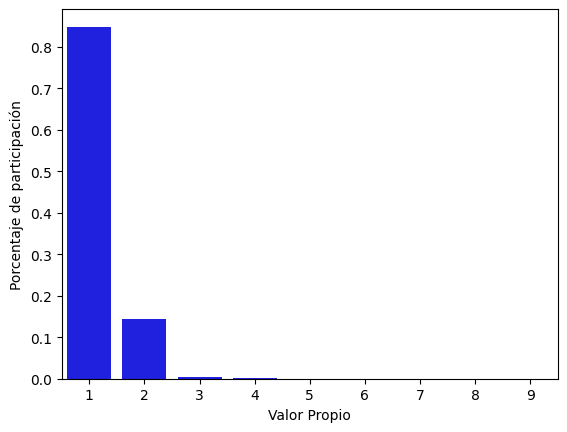

In [52]:
Porcentaje_Valor_Propio = np.round(S/np.sum(S), decimals=5) # Escalar, para obtener el porcentaje de participación.

sb.barplot(x=list(range(1,len(Porcentaje_Valor_Propio)+1)),
            y=Porcentaje_Valor_Propio, color="blue", orient='v')
plt.xlabel('Valor Propio')
plt.ylabel('Porcentaje de participación')

La siguiente grafica nos permite ver el porcentaje de cada valor propio. Note que este no resulta muy claro por ende, es mejor trabajar con el gráfico de barras.

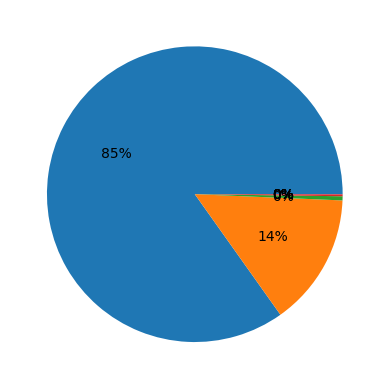

In [53]:
plt.pie(Porcentaje_Valor_Propio, autopct='%.0f%%')

# displaying chart
plt.show()

5. Determine cuál o cuáles atributos son los más representativos de los datos. Puede distinguirse un grupo de atributos que represente el 90% de los datos?

In [39]:
import numpy as np
import pandas as pd

X = Hamburguesas[['TotalFat_g','Sodium_mg',
                  'CaloriesFromFat', 'SaturatedFat_g',
                  'TransFat_g', 'Cholesterol_mg',
                  'Carbohydrates_g', 'Fiber_g',
                  'Sugars_g', 'Protein_g']].replace(',', '.', regex=True).astype(float).values

Y = Hamburguesas[['Calories']].replace(',', '.', regex=True).astype(float).values

# Generamos una columna de unos y la insertamos como primera columna de X
Unos = np.ones(len(Hamburguesas))
X = np.insert(X, 0, Unos, axis=1)  # Conversión correcta sin repetir la inserción

# Cálculo de la seudo-inversa de Moore-Penrose
MPenrouse = np.linalg.pinv(np.matmul(X.T, X))
C = np.matmul(MPenrouse, X.T)
B = np.matmul(C, Y)

print(B)


[[-1.96423167e+00]
 [ 5.03020697e+00]
 [-2.27096492e-03]
 [ 4.07366167e-01]
 [ 1.55951517e+00]
 [-2.29162723e+00]
 [-5.16515237e-02]
 [ 4.22613012e+00]
 [-1.74247698e+00]
 [-7.23286529e-01]
 [ 4.21705750e+00]]


Realizando un análisis multilineal, obtenemos los siguientes coeficientes:

$$
\beta_0 = -1.960, \quad \beta_1 = 5.030, \quad \beta_2 = -0.002, \quad \beta_3 = 0.407, \quad \beta_4 = 1.560,
$$
$$
\beta_5 = -2.292, \quad \beta_6 = -0.052, \quad \beta_7 = 4.226, \quad \beta_8 = -1.742, \quad \beta_9 = -0.723, \quad \beta_{10} = 4.217.
$$

Lo que nos lleva a concluir que los atributos más representativos son:
- TotalFat_g
- Carbohydrates_g
- Protein_g

In [40]:
import pandas as pd
import numpy as np

# Seleccionar solo columnas numéricas
DatosNumericos = Hamburguesas.select_dtypes(include='number')

# Calcular la media solo de columnas numéricas
media_numerica = DatosNumericos.mean()

# Restar la media a cada fila
Datos_centralizados = DatosNumericos.sub(media_numerica, axis=1)

# Seleccionar solo las columnas necesarias
columnas_seleccionadas = ['TotalFat_g', 'Sodium_mg', 'CaloriesFromFat', 'SaturatedFat_g',
                           'TransFat_g', 'Cholesterol_mg', 'Carbohydrates_g', 'Fiber_g',
                           'Sugars_g', 'Protein_g']

# Verificar si las columnas existen en Datos_centralizados
columnas_validas = [col for col in columnas_seleccionadas if col in Datos_centralizados.columns]

# Convertir a matriz NumPy
D = Datos_centralizados[columnas_validas].values

# Calcular la matriz de covarianza
C = np.matmul(D.T, D) / len(D)

# Descomposición en valores singulares (SVD)
U, S, V = np.linalg.svd(C, full_matrices=True)

# Imprimir resultados
print(U)
print(S)
print(V)


[[-1.65077417e-02  1.05613565e-01 -2.91862674e-02  1.33387805e-02
  -2.02337855e-02 -1.22224642e-02 -4.49571199e-02 -9.92453309e-01]
 [-9.87619003e-01 -1.55268014e-01  5.12385864e-03  2.02679286e-02
  -7.93328868e-03  6.94396381e-04 -2.24055684e-04  1.89288760e-04]
 [-1.48481593e-01  9.45843964e-01 -2.53667414e-01  7.63858633e-02
   9.06721228e-03  2.71991711e-02  1.45795143e-03  1.11023961e-01]
 [-3.95602686e-02  2.60294827e-01  9.01445940e-01 -2.23884205e-01
  -1.76798657e-01 -1.86302025e-01  4.44864803e-02  2.72246830e-03]
 [-2.18640509e-02  5.18275555e-03 -2.72041529e-01 -9.24774017e-01
   6.03877949e-02 -2.56762582e-01 -2.66021319e-02 -3.77682606e-04]
 [-1.81634067e-03 -1.23006545e-03 -1.75073458e-02 -4.00700345e-02
   1.15168399e-01  8.78648657e-02  9.87303541e-01 -4.82783223e-02]
 [-1.45560522e-03  4.35019699e-03  7.46455739e-03 -2.63151279e-01
  -4.98465160e-01  8.25547227e-01 -2.59712398e-02 -2.09712973e-03]
 [-1.55224251e-02  4.81260787e-02  2.18634735e-01 -1.31875564e-01
   

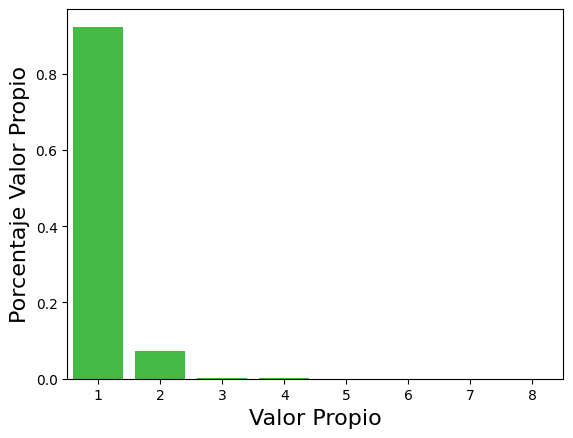

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
Porcentaje_Valor_Propio = np.round(S/np.sum(S), decimals=3)
Porcentaje_Valor_Propio

sns.barplot(x=list(range(1,len(Porcentaje_Valor_Propio)+1)),
            y=Porcentaje_Valor_Propio, color="limegreen")
plt.xlabel('Valor Propio', fontsize=16)
plt.ylabel('Porcentaje Valor Propio', fontsize=16)
plt.savefig('svd_scree_plot.png',dpi=100)

In [42]:
u1 = U[:, 0]
u1_abs = np.abs(u1)
participacion_porcentual = (u1_abs / np.sum(u1_abs)) * 100

print(U.shape)  # Debe ser (n_variables, n_variables)
print(len(DatosNumericos.columns))  # Verifica el número de columnas
DatosNumericos = DatosNumericos[columnas_validas]  # Solo mantener columnas en D


pr = pd.DataFrame(participacion_porcentual,DatosNumericos.columns)
pr

(8, 8)
9


,0
TotalFat_g,1.339015
Sodium_mg,80.110103
CaloriesFromFat,12.043992
Cholesterol_mg,3.208907
Carbohydrates_g,1.773489
Fiber_g,0.147331
Sugars_g,0.118071
Protein_g,1.259092


Está claro que el conjunto de atributos $\{Sodium\_mg, CaloriesFromFat\}$ es el mínimo que representa al menos el 90% de los datos, de hecho, representa el:

$$ 92.154095 $$

6. Si es posible, clasifique los atributos en orden de importancia, según participen con mayor proporción en la representación de los datos.

In [43]:
pr = pd.DataFrame(participacion_porcentual, index=DatosNumericos.columns, columns=['Participación (%)'])
pr_sorted = pr.sort_values(by='Participación (%)')  # Orden ascendente
print(pr_sorted)


                 Participación (%)
Sugars_g                  0.118071
Fiber_g                   0.147331
Protein_g                 1.259092
TotalFat_g                1.339015
Carbohydrates_g           1.773489
Cholesterol_mg            3.208907
CaloriesFromFat          12.043992
Sodium_mg                80.110103


7. Determine si los datos determinan de alguna manera la empresa de donde provienen las hamburguesas.

In [44]:
import plotly.express as px

DU = np.matmul(D, U[:, :2])

df_pca = pd.DataFrame(DU, columns=['PC1', 'PC2'])
df_pca['Restaurant'] = Hamburguesas['Restaurant']

fig = px.scatter(df_pca, x='PC1', y='PC2', color='Restaurant',
                 title="Proyección de los Datos en las Primeras Dos Componentes Principales",
                 labels={'PC1': 'Componente Principal 1', 'PC2': 'Componente Principal 2'})

fig.show()


Podemos observar como al proyectar los datos sobre las primeras dos componentes principales, donde se tiene mas del 90% de la representación de los datos, no hay una diferenciación clara de la empresa de donde provienen las hamburguesas. Por lo tanto los datos no pueden determinar esto (más alla de la propia columna "restaurant").

8. Haga un gráfico tridimensional de los datos usando:
- Los tres atributos más representativos.


In [45]:
fig_3D = px.scatter_3d(Hamburguesas, x='Sodium_mg', y='CaloriesFromFat', z='Cholesterol_mg', color='Restaurant',
                        title="Tres atributos más representativos")
fig_3D.show()

- Las tres componentes más representativas asociadas a los tres valores propios más representativos.

In [46]:
DU_3D = np.matmul(D, U[:, :3])

df_3D = pd.DataFrame(DU_3D, columns=['PC1', 'PC2', 'PC3'])
df_3D['Restaurant'] = Hamburguesas['Restaurant']

fig_3D = px.scatter_3d(df_3D, x='PC1', y='PC2', z='PC3', color='Restaurant',
                        title="Proyección 3D de los Datos en las Tres Primeras Componentes Principales",
                        labels={'PC1': 'Componente Principal 1', 'PC2': 'Componente Principal 2', 'PC3': 'Componente Principal 3'})

fig_3D.show()